<font size=6>**Lecture 4: SVM and Cross-Validation**</font>
<div style="border: 1px solid lightgray; padding: 10px; background-color: #f9f9f9;">

<font size=1>

    Paolo Bonfini, 2024. All rights reserved.

This work is the intellectual property of `Paolo Bonfini`. All content produced in this notebook is original creation of the author unless specified otherwise. Unauthorized use, reproduction, or distribution of this material, in whole or in part, without explicit permission from the author, is strictly prohibited.
</font>
</div>

_NOTE: The theory and definition reported here is just a summary, for the whole picture refer to Gerone (2017) book, chapter 5._

- - -

# Support Vector Machine (a.k.a. SVM)

## Historical importance

**SVM** may be "just another" classifier (and _regressor_).

However, this specific algorithm represented an **historical pivotal point** for several reasons $-$ among which:

- It **dominated** the Machine Learning landscape in the 1990s

> _Due to its success on diverse benchmark datasets (_text classification, image recognition, etc._) it temporarily shadowed the other emerging competitor: Neural Networks._

- It introduced the **kernel trick** (_see later_)

> _A simple mathematical trick that allows to solve non-linear problems by implicitly mapping data to a higher-dimensional space._ 

- It has a **groudbraking theoretical** fundation

> _By shifting the attention to the "gerneralization error", it provided the rigorous framework used by modern ML._

## What SVM tries to do

Simply put $-$ SVM tries to find (fit) the **widest** possible "street" between the classes:
<br><br>

<div>
   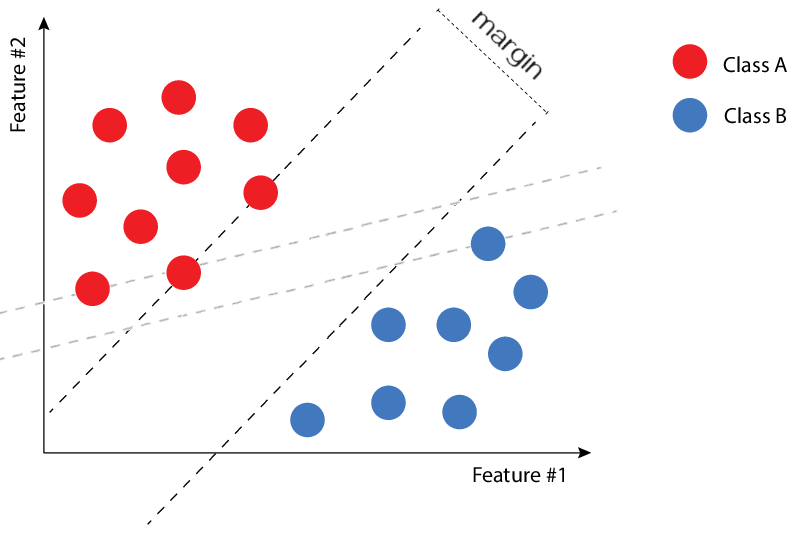
</div>

<table><tr>
    <td width=500>
        <center>
            <br>
            Figure 1. The class-separating margin (<i>within the black lines</i>) identified by SVM, in a 2-class problem.<br>
            (Adapted from <a href="https://databasecamp.de/en/ml/svm-explained">here</a>)
        </center>
    </td>
</tr></table>

> _In other words, it tries to separate the classes as much as possible_

The "street" is formaly called "**margin**".  The hyperplane cutting it into half is the "**separation hyperplane**" (or "classification hyperplane").

$\rightarrow$ Once fit, the classes can be separated depending on which side of the **separation hyperplane** they fall. 

## SVM: Linear, Separable case

Let's define the hyperplane $h(\pmb{x})$ when the classes are **linearly separable**:
<br><br>

<div>
   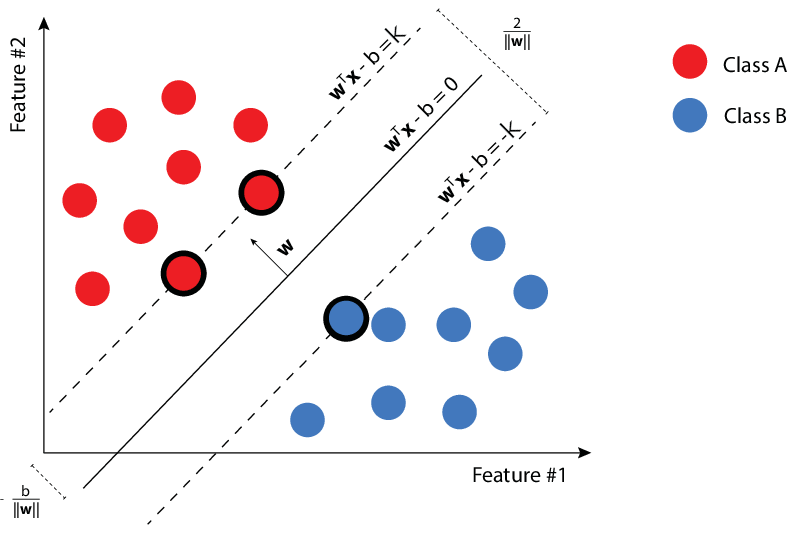
</div>

<table><tr>
    <td width=500>
        <center>
            <br>
            Figure 2. Linearly separable classes, and problem definition.<br>
            (Adapted from <a href="https://www.researchgate.net/figure/Soft-margin-SVM-example-the-encircled-samples-are-correctly-classified-but-they-are-on_fig2_332402217">here</a>)
        </center>
    </td>
</tr></table>

In $d$ dimensions, an hyperplane can be written as (_notice the similarity with the linear modelling_):

$$ h(\pmb{x}) = \pmb{w}^T \pmb{x} + b $$

where:
- $\pmb{w}$ is some vector perpendicular to the hyperplane
- $h(\pmb{x}) = 0$ if a point $\pmb{x}$ is exactly on the plane
- $h(\pmb{x}) > 0$ [or $h(\pmb{x}) < 0$] if $\pmb{x}$ falls on a side of the plane

The **Decision Function** is therefore very simple:

$$
\hat{y} = 
\begin{cases} 
1 & \text{if } \pmb{w}^T \pmb{x} + b > 0 \\
0 & \text{if } \pmb{w}^T \pmb{x} + b \leq 0 
\end{cases}
$$

$\rightarrow$ we just need to find $\pmb{w}$ and $b$ by _fitting_!
<br><br>

### Defining the optimization problem

There are at least 3 points (see _Figure 2_) which touch the margin $\rightarrow$ "**support vectors**"

The support vectors are located at _some_ $\pm k$ from the hyperplane. 

$\rightarrow$ With basic geometry, we can see that the **margin width** is:

$$ {2k \over ||w||}$$

So the **optimization problem** becomes:

> Find $\pmb{w}$, $b$, that optimize:

$$
\begin{align*}
\max_{w, b} \quad & {2k \over ||w||} \\
\text{s.t.} \quad & \pmb{w} x + b \geq k, & \text{for } x \in \text{class 1} \\
& \pmb{w} x + b \leq -k, & \text{for } x \in \text{class 2}
\end{align*}
$$

Now, some <u>simplifications<u>:
- $k$ depends on the data normalization, but is a **constant** $\rightarrow$ _we can ignore it in the maximization, and set it to 1_
- The $max$ of ${2 \over ||w||}$ is the same as the $max$ of ${2 \over ||w||^2}$ $\rightarrow$ _easier to maximize_
- The $max$ of ${2 \over ||w||}$ is the same as the $min$ of ${||w||^2 \over 2}$ $\rightarrow$ _easier, no singularity_
- The two inequalities can be re-written as a single one (_see Logistic Regression trick_) $\rightarrow$ $y_i (\pmb{w} x_i + b) \geq 1, \forall x_i$

    > Find $\pmb{w}$, $b$, that optimize:
   
$$
\begin{align*}
\min_{w, b} \quad & {||w||^2 \over 2} \\
\text{s.t.} \quad & y_i (\pmb{w} x_i + b) \geq 1, \quad \forall x_i \tag{Eq.1}\\
\end{align*}
$$

- - -
<u>Solution</u>
    
$\checkmark$ _Convex problem_ $\rightarrow$ Unique minimum
    
$\times$ <u>Non</u>-solvable if data are <u>not</u> linearly separable
    
Anyways, how do we use e.g. **Gradient Descent** ... when there is a **constraint** ???
    
&emsp;&emsp; $\text{s.t.} \quad y_i (\pmb{w} x_i + b) \geq 1, \forall x_i $ $~~~~~\leftarrow$ ***_insert surprised pikachu face_
    
$\rightarrow$ **Quadratic Programming solvers** can deal with linear constraints

## SVM: Linear, non-Separable case

_Alas_, in real data classes are usually **non-linearly separable** (_i.e., overlapping, not separable by an hyperplane_):
<br><br>

<div>
   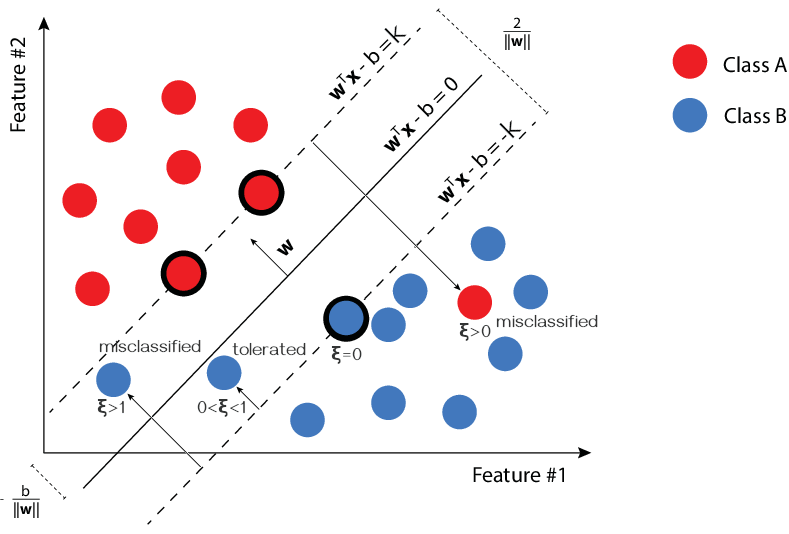
</div>

<table><tr>
    <td width=500>
        <center>
            <br>
            Figure 3. Non-linearly separable classes, and problem definition.<br>
            (Adapted from <a href="https://www.researchgate.net/figure/Soft-margin-SVM-example-the-encircled-samples-are-correctly-classified-but-they-are-on_fig2_332402217">here</a>)
        </center>
    </td>
</tr></table>

$\rightarrow$ We can introduce a "**slack variable**" $\xi$<br>
&emsp;&ensp; (_[Corinna Cortes & Vladimir Vapnik, 1995](http://image.diku.dk/imagecanon/material/cortes_vapnik95.pdf); NOTE: Corinna is currently Vice President at Google Research_)

- $\xi = 0$ : Support vector point
- $0 < \xi < 1$ : Point beyond the margin, but on the correct side of the classification hyperplane
- $1 < \xi$ : Misclassified point

We need to **penalize** our cost function (_Equation 1_) using $\xi$ $-$ This is called "**soft-margin**" problem:

$$
\begin{align*}
\min_{w, b} \quad & {||w||^2 \over 2} + C\sum_i \xi_i \\
\text{s.t.} \quad & y_i (\pmb{w} x_i + b) \geq 1 - \xi_i, \quad \forall x_i\\
& \xi_i \geq 0 \tag{Eq.2}\\
\end{align*}
$$

> _This is actually the SVM we **use** in practical applications._

<u>Intuition</u>:
- Try to maintain every $\xi_i$ to zero while maximizing margin
- As $C \rightarrow 0$, we to back to the "**hard margin**" case

where $C$ is a **hyperparameter** regulating the "tolerance" to the violations (_fixed_) while every $\xi_i$ is a **parameter** (_must be fit_).

- - -
<u>Solution</u>
   
$\rightarrow$ **Quadratic Programming solvers** can also solve this non-Separable case

## SVM: Non-Linear case & kernel trick

What if we **can't separate efficiently** the classes with a hyperplane, even with soft-margin SVM?

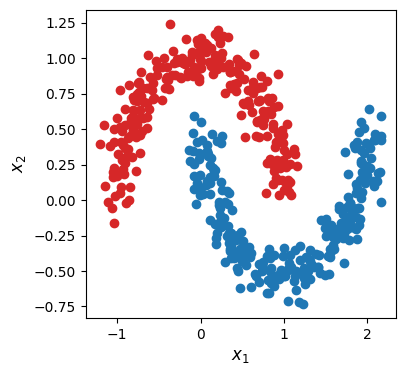

In [1]:
from sklearn.datasets import make_moons
 
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

from matplotlib import pyplot as plt
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c="C0")
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c="C3")
plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12)
plt.show()

Let's start from a simple 1D case:

In [2]:
#%pip install plotly
import numpy as np
import plotly
import plotly.graph_objects as go

# Set notebook mode to work in offline:
import plotly.io as pio
pio.renderers.default = 'iframe'

X = np.array([-1.8, -1.6, -1.5, -0.8, 0, 0.4, 1.2, 1.7, 1.9])
y = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1])

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X[y==0], y=np.zeros(len(X[y==0])), mode='markers', name='class 0',
    marker=dict(symbol='circle', size=20, color='royalblue')
))
fig.add_trace(go.Scatter(
    x=X[y==1], y=np.zeros(len(X[y==1])), mode='markers', name='class 1',
    marker=dict(symbol='triangle-up', size=20, color='crimson')
))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, 
                 zeroline=True, zerolinecolor='black', zerolinewidth=3,
                 showticklabels=False)
fig.update_layout(height=300, plot_bgcolor='white')
fig.show()

Well, we could try to **artificially increase the dimensions**, and try to use a hyperplane in the **extended feature space**:<br>
(_sort of what we saw for Logistic Regression ..._)


$$ (x_1): \mathbb{R} \rightarrow (x_1, x_2): \mathbb{R}^2$$
$$ (x) \rightarrow (x, x^4)$$


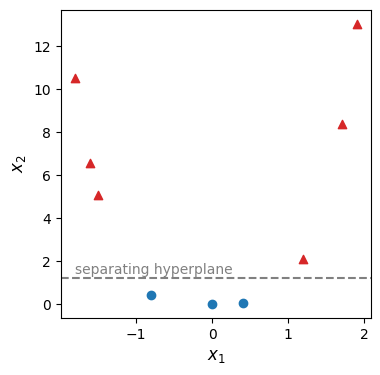

In [3]:
X_prime = np.c_[X, X**4]

from matplotlib import pyplot as plt
plt.figure(figsize=(4, 4))
plt.scatter(X_prime[:, 0][y==0], X_prime[:, 1][y==0], marker='o', c="C0")
plt.scatter(X_prime[:, 0][y==1], X_prime[:, 1][y==1], marker='^', c="C3")
plt.axhline(y=1.2, ls='--', c='grey')
plt.text(-1.8, 1.4, 'separating hyperplane', c='grey')
plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12)
plt.show()

As the problem becomes more complex, we may want to send the data to **even higher** dimensional spaces:

$$ (x): \mathbb{R} \rightarrow (x_1, x_1^2, 2x_1x_2, x_2^2): \mathbb{R}^4$$

... or, up to degree 10, with all the cross terms:

$$ (x): \mathbb{R} \rightarrow (x_1^{10}, x_1^9 x_2, ..., x_1^3x_2^3x_3^3x_4, ..., x_{10}^{10}): \mathbb{R}^{66}$$

Or even to an **infinite dimensional space**, e.g. sending a point $x_i$ to the space of **all** the points of a Gaussian centered on $x_i$:

$$ (x): \mathbb{R} \rightarrow \Phi(x, t) = exp\big(-\gamma||x_i - t||^2\big): \mathbb{R}^{\infty}$$



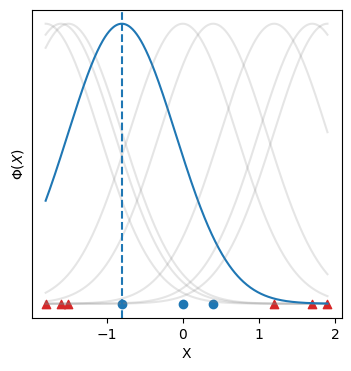

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, gamma=1, sigma=1):
    return np.exp(-gamma*(x - mu)**2)

plt.figure(figsize=(4, 4))
plt.scatter(X[y==0], np.zeros(len(X[y==0])), marker='o', c="C0")
plt.scatter(X[y==1], np.zeros(len(X[y==1])), marker='^', c="C3")

idx = 3
xx = np.linspace(np.min(X), np.max(X), 400)
for i in range(len(X)):
    color = 'C0' if i == idx else 'grey'
    alpha = 1    if i == idx else 0.2
    yy = gaussian(xx, X[i])
    plt.plot(xx, yy, c=color, alpha=alpha)
plt.axvline(x=X[idx], ls='--')

plt.xlabel('X')
plt.ylabel('$\Phi(X)$')
plt.yticks([])

plt.show()

How can we deal with **infinite dimensions**?

> _This is possible in SVM thanks to the so-called "**kernel trick**"._

First, notice that our optimization problem of _Equation 2_,

$$
\begin{align*}
\min_{w, b} \quad & {||w||^2 \over 2} + C\sum_i \xi_i \\
\text{s.t.} \quad & y_i (\pmb{w} x_i + b) \geq 1 - \xi_i, \quad \forall x_i\\
\quad & \xi_i \geq 0\\
\end{align*}
$$

can be transformed into:

$$
\begin{align*}
\min_{\alpha_i} \quad & {1 \over 2}\sum_{i,j} \alpha_i \alpha_j y_i y_j x_i^T x_j - \sum_i \alpha_i \\
\text{s.t.} \quad & C \geq \alpha_i \geq 0, \quad \forall x_i\\
& \sum_i \alpha_i y_i = 0 \tag{Eq. 3}\\
\end{align*}
$$

where the $\alpha_i$'s are **new parameters** to be _fit_, and $i$ and $j$ are sample indices.

(_not demonstrated here; but see later "**Dual Lagrangian**" to understand the rationale behind it_)

Now, if we map $x \rightarrow \Phi(x)$, we simply get:

$$
\begin{align*}
\min_{\alpha_i} \quad & {1 \over 2}\sum_{i,j} \alpha_i \alpha_j y_i y_j \Phi(x_i)^T \Phi(x_j) - \sum_i \alpha_i \\
\text{s.t.} \quad & C \geq \alpha_i \geq 0, \quad \forall x_i\\
& \sum_i \alpha_i y_i = 0\\
\end{align*}
$$

- - -

The **kernel trick** simply states that we can replace the _impossible-to-calculate_ $\Phi(x_i)^T \Phi(x_j)$ (because it happens in an $\infty$-dimensional space) with:

$$ \Phi(x_i)^T \Phi(x_j) = K(x_i, x_j) $$

where $K$ is e.g., the Gaussian we mentioned above:

$$K (x_i, x_j) = exp\big(-\gamma||x_i - x_j||^2\big) $$

except that now we don't have to calculate infinite values, but just the one for ($x_i$, $x_j$).

Therefore, our optimization problem **finally becomes**:

$$
\begin{align*}
\min_{\alpha_i} \quad & {1 \over 2}\sum_{i,j} \alpha_i \alpha_j y_i y_j K(x_i, x_j) - \sum_i \alpha_i \\
\text{s.t.} \quad & C \geq \alpha_i \geq 0, \quad \forall x_i\\
& \sum_i \alpha_i y_i = 0 \tag{Eq. 4}\\
\end{align*}
$$


<u>IMPORTANT</u>

> In reality <u>we don't choose</u> $\Phi(.)$ and then we find the $K(.,.)$ such that $ \Phi(x_i)^T \Phi(x_j) = K(x_i, x_j)$
>
> _We use it the other way around!_
>
><u>We define some simple $K(.,.)$</u> (_e.g., the Gaussian_), and we **assume** there exists some feature space $\Phi(.)$ (_that we never have to use_!) such that $ \Phi(x_i)^T \Phi(x_j) = K(x_i, x_j)$


- - -

**Kernels**

Can we choose **any** function $K(.,.)$? $\rightarrow$ **NO**

But any function which is "**well behaved**" can work as a kernel!<br>
_Namely: symmetric, continuous, positive semi-definite_ ($\rightarrow$ Mercer's Teorem)

# SVM in sklearn

The following cell shows a trained Support Vector Machine classifier.
The decision function (color shades and iso-contours) _and_ the separation hyperplane (solid lines/curves) along with the margins (dashed lines/curves) passing through the **support vectors**.

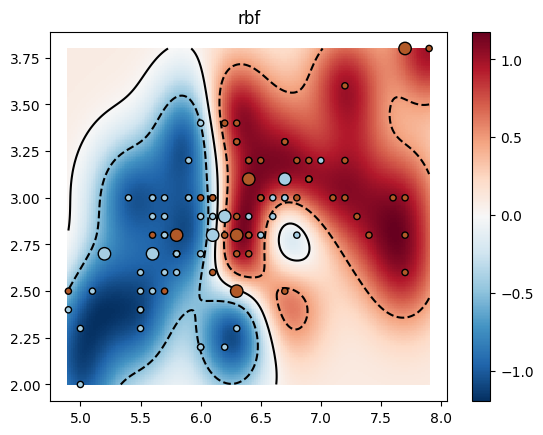

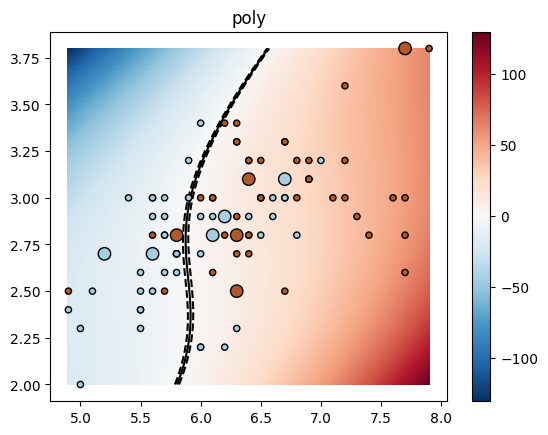

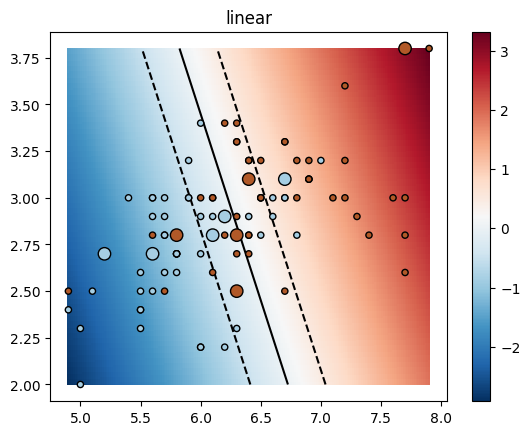

In [10]:
# This example is adopted from here:
#     https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py
# ... but adjusting the plotting as suggeted here:
#     https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# suppressing Matplotlib warnings for previous versions
from matplotlib import cm
from sklearn import datasets, svm
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

# fit the model
for kernel in ("rbf", "poly", "linear"):
    
    clf = svm.SVC(kernel=kernel, C=1, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    series = plt.pcolormesh(XX, YY, Z , cmap=cm.get_cmap("RdBu_r"))
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    # Plotting the support vectors for the linear case
    # NOTE: Plotting these will look confusing because it is not a linearly
    #       separable dataset!
    #
    #decision_function = clf.decision_function(X_train)
    #support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    #support_vectors = X_train[support_vector_indices]
    #plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
    #            s=100, linewidth=1, facecolors="none", edgecolors="k")    

    plt.colorbar(series)
    plt.title(kernel)
plt.show()

## Cost and decision functions

Notice how **cost** and **decision** functions are 2 different things.

For SVM:

- The **decision function** (which decides on the classification of data point **$x$**) is the _signed distance to the separating hyperplane_:

    $$h(\boldsymbol{x})=\boldsymbol{w}^T\boldsymbol{x}+b$$

- The **cost function** (which is used to train the SVM by minimizing the separation of the hyperplanes) is the _sum of the squared errors and penalizations_:

    $$L(\boldsymbol{w},\boldsymbol{\xi}) = {||\boldsymbol{w}||^2 \over 2}+C\sum_{i} \xi_{i} $$

_See discussion [here](https://stats.stackexchange.com/questions/104988/what-is-the-difference-between-a-loss-function-and-decision-function)._


In [11]:
# e.g., let's print the decision function in one specific point: 
x_ = np.array([[5, 2.25]])
clf.decision_function(x_)

array([-2.55961794])

# Lagrange Multipliers to solve Constrained Optimization

We said that **Quadratic Programming solvers** can deal with constrained optimization.

_BUT ..._<br>

1. It's <u>not always practical</u>

    - May be computationally **very expensive**
    - Don't offer inherent **regularization** for more stability
    - The solution is not **sparse** (uses all the data during the search; _as opposed to the "**Dual Lagrangian**" $-$ see later_)<br><br>

2. <u>Doesn't allow for non-linear separations</u> (_"**kernel trick**"_)

Let's see how a constrained optimization problem can be solved in a _more general way_.

- - -

Let's see a generic case where we need to _minimize_ a function $f(\pmb{x})$, given the constraint that the optimal $\pmb{\hat{x}}$ shall also satisfy $g(\pmb{x}) = c$ :
<br><br>

<div>
   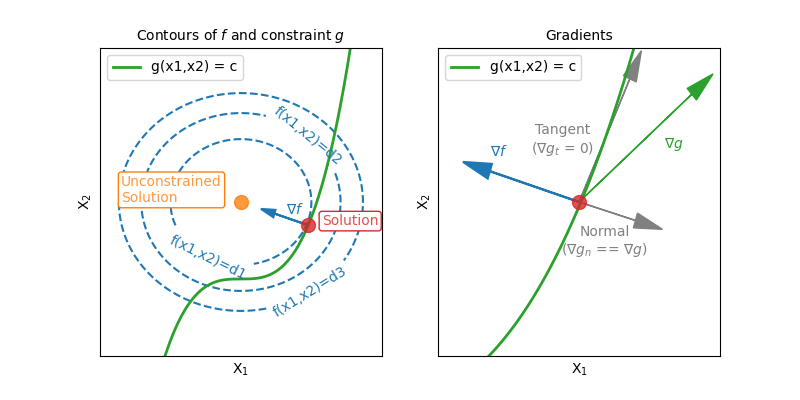
</div>

<table><tr>
    <td width=600>
        <center>
            <br>
            Figure 4. A generic case of constrained optimization of a function $f$ with equality constraint $g$.<br>
            (Image credits: Paolo Bonfini)
        </center>
    </td>
</tr></table>

> _Normally, we would only follow the gradient of $f(\pmb{x})$ to the solution (orange point), but now we are constrained ("anchored") along $g(\pmb{x})$ ..._

Note that the tangent component of the gradient of $g$, i.e., $\nabla g_t$ is by construction $= 0$ because $g$ is constant along the curve (_left panel in figure_)<br>
$\rightarrow$ $\nabla g$ must be **perpendicular to the curve** $g$.

We know that, at the optimal point $\hat{\pmb{x}}$ (_red point in figure_) <u>the gradients of the two functions must be parallel</u>.

> _In other words, the derivatives are the same except for a constant $\alpha$_:

$$
\begin{equation}
\partial_{x^j} f(\pmb{\hat{x}}) = \alpha ~ \partial_{x^j} g(\pmb{\hat{x}}), \quad \forall j \tag{Eq. 5}
\end{equation}
$$
<br>

<u>Idea</u> $\rightarrow$ We combine the 2 functions into a more powerful one, the **Lagrangian**:

$$ L(\pmb{x}, \alpha) = f(\pmb{x}) - \alpha ~ (g(\pmb{x}) - c)$$

where we call $\alpha$ the "**lagrangian multiplier**".

- - -

<u>Now witness the magic:</u> At the solution point $\hat{\pmb{x}}$, the derivatives of $ L(\pmb{x}, \alpha) $ are all 0, both respect to $\alpha$ and $\pmb{x}$! $-$ In fact:

- $ {\partial L(\pmb{\hat{x}}, \alpha) \over \partial \alpha} = {\partial f(\pmb{\hat{x}}) - \alpha ~ (g(\pmb{\hat{x}}) - c) \over \partial \alpha} = g(\pmb{\hat{x}}) - c \quad$ ... which is 0 because $g(\pmb{x}) = c$
<br>

- $ {\partial L(\pmb{\hat{x}}, \alpha) \over \partial x^j} = {\partial f(\pmb{\hat{x}}) - \alpha ~ (g(\pmb{\hat{x}}) - c) \over \partial x^j} = \partial_{x^j} f(\pmb{\hat{x}}) - \alpha ~ \partial_{x^j} g(\pmb{\hat{x}}) \quad$ ... which is 0 because of _Equation 5_.


Therefore, at the solution point $\pmb{\hat{x}}$:

$$ \nabla L(\pmb{\hat{x}}, \alpha) = 0 $$

$\rightarrow$ We moved the optimization problem from $f(\pmb{x})$ and $g(\pmb{x})$ to just one function: $L(\pmb{x}, \alpha)$!

- - -

So, the **optimization problem** becomes:

> Minimize $L(\pmb{x}, \alpha)$ w.r.t. $\pmb{x}$, and maximize it w.r.t. $\alpha$:

$$
\begin{align*}
\min_{\pmb{w}} \max_{\alpha} \quad & L(\pmb{x}, \alpha)\\
\text{s. t.} \quad & \alpha \geq 0 \tag{Eq. 6}
\end{align*}
$$

Minimize w.r.t. $\pmb{x}$ is obvious, but why **maximize** w.r.t. $\alpha$?

> _The Lagrange multiplier can be thought of as a penalty or price associated with violating the constraint.<br>
> So if we maximize w.r.t. $\alpha$ $\rightarrow$ we "push" the solution towards $g(\pmb{x}) = c$._

$\rightarrow$ Solvable alternating **Gradient Descent** steps in $\pmb{x}$ and  **Gradient Ascent** $\alpha$<br>
&emsp;&ensp; (_once we step down along $\nabla_{\pmb{x}}L$, the next we step up along $\nabla_{\alpha}L$, and repeat_).

## Fast-forward:  the Dual Lagrangian

In reality, we had to address not an equality constraint (like $g(\pmb{x}) = c$), but the **inequality constraint** of Equation 1:

$$ y_i (\pmb{w} x_i + b) \geq 1, \forall x_i $$

We need to include inequality constraints in the Lagrangian.

<font size=3><u>**Generalized Lagrangian**</u><font>

Given an optimization problem:

$$
\begin{align*}
\min_{x \in \mathbb{R}^n} \quad & f(x) \\
\text{s. t.} \quad & h_i(x) = 0, \quad i = 1, \ldots, m \\
& g_j(x) \leq 0, \quad j = 1, \ldots, p
\end{align*}
$$

where:
- $( f: \mathbb{R}^n \rightarrow \mathbb{R} )$ is the objective function
- $( h_i: \mathbb{R}^n \rightarrow \mathbb{R} )$ are equality constraints
- $( g_j: \mathbb{R}^n \rightarrow \mathbb{R} )$ are inequality constraints

We can define the **Generalized Lagrangian** $( L: \mathbb{R}^n \times \mathbb{R}^m \times \mathbb{R}^p_+ \rightarrow \mathbb{R} )$ as:
$$
L(x, \lambda, \mu) = f(x) + \sum_{i=1}^m \lambda_i h_i(x) + \sum_{j=1}^p \mu_j g_j(x)
$$

where:
- $\lambda = (\lambda_1, \ldots, \lambda_m)$ are the Lagrange multipliers associated with the equality constraints
- $\mu = (\mu_1, \ldots, \mu_p)$ are the Lagrange multipliers associated with the inequality constraints,  $\mu_j \geq 0, \forall j$


> _This is a solvable min max problem, but we will go one step further, to be able to <u>also</u> solve non-linear SVM (see later)._

<font size=3><u>**Karush-Kuhn-Tucker (KKT) conditions**</u><font>

If some conditions are respected, optimizing the **Generalized Lagrangian** becomes much easier $-$ These are:

- Stationarity Condition: $\nabla_x L(x, \lambda, \mu) = 0$
- Primal Feasibility:
$
\begin{aligned}
        h_i(x) &= 0, \quad i = 1, \ldots, m \\
        g_j(x) &\leq 0, \quad j = 1, \ldots, p
\end{aligned}
$

- Dual Feasibility: $ \mu_j \geq 0, \quad j = 1, \ldots, p$   

- Complementary Slackness: $\mu_j g_j(x) = 0, \quad j = 1, \ldots, p$


<font size=3><u>**Dual optimization Problem**</u><font>

By plugging in the KKT conditions, and after some manipulation, the Lagrangian optimization problem of _Equation 6_ (**Primal Problem**),

$$
\begin{align*}
\min_{\pmb{w}} \max_{\alpha} \quad & L(\pmb{x}, \alpha)
\text{s. t.} \quad & \alpha \geq 0
\end{align*}
$$

becomes the much simpler **Dual optimization Problem**.

Having defined the **Lagrangian dual function**:
$$ q(\lambda, \mu) = \inf_{x} L(x, \lambda, \mu) $$

the **Dual optimization Problem** is:

$$
\begin{align*}
\max_{\lambda, \mu} \quad & q(\lambda, \mu) \\
\text{s.t.} \quad & \lambda \geq 0 \tag{Eq. 7}
\end{align*}
$$

> _The Dual Problem is simpler to optimize because it is <u>only maximized on the lagrangian multipliers</u> (no min$~$max)_

## Back to SVM

It can be demonstrated that **the SVM problem can be framed** to satisfy the KKT conditions.<br>

$\rightarrow$ In fact, _Equation 3_ is the **Dual** of the SVM problem. 

- - -

_It is strongly advised to have at least a glimpse at [these great notes](https://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/) to get a better idea of the rationale behind Dual Lagrangian optimization for SVM._

# Cross Validation

## Standard train-validation-test protocol

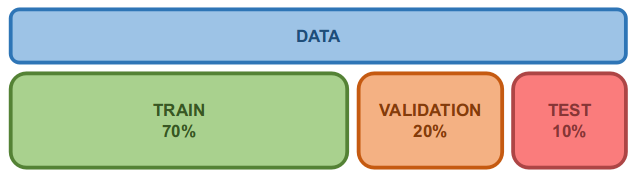
<table><tr>
    <td width=640>
        <center>
            <br>
            Figure 5.  Indicative recipe for splitting a dataset into the analysis sets.<br>
            For very large datasets (above 10$^5$ entries), the percentages of validation and test can be substantially smaller.
            <br>
        </center>
    </td>
</tr></table>



What are the different sets for? We already had a hint from the _Classification_ sessions.

- **Train** set $~~~~~~\rightarrow$ **Learn** the model parameters

- **Validation** set $\rightarrow$ Check that the learnt model is not **overfitting/underfitting** the train set

- **Test** set $~~~~~~~\rightarrow$ **Assess** the model performance

<u>IMPORTANT:</u> Always _re_-fit on all **Train** + **Validation** data to obtain the best model (and **Test** <u>if</u> you don't plan further analysis).

## Cross Validation protocol (a.k.a. $k$-fold Cross Validation)

    Am I overfitting the train set?

This is a common doubt when we split our data in just a **train**, [a **validation**] and a **test** set.

_Would the results change if we shuffled the data differently?_

- - -

**Cross Validation** is a tecnique used assess how a model would **generalize** to unseen data.

It involves _re-fitting_ the model over different partitionings of the dataset:

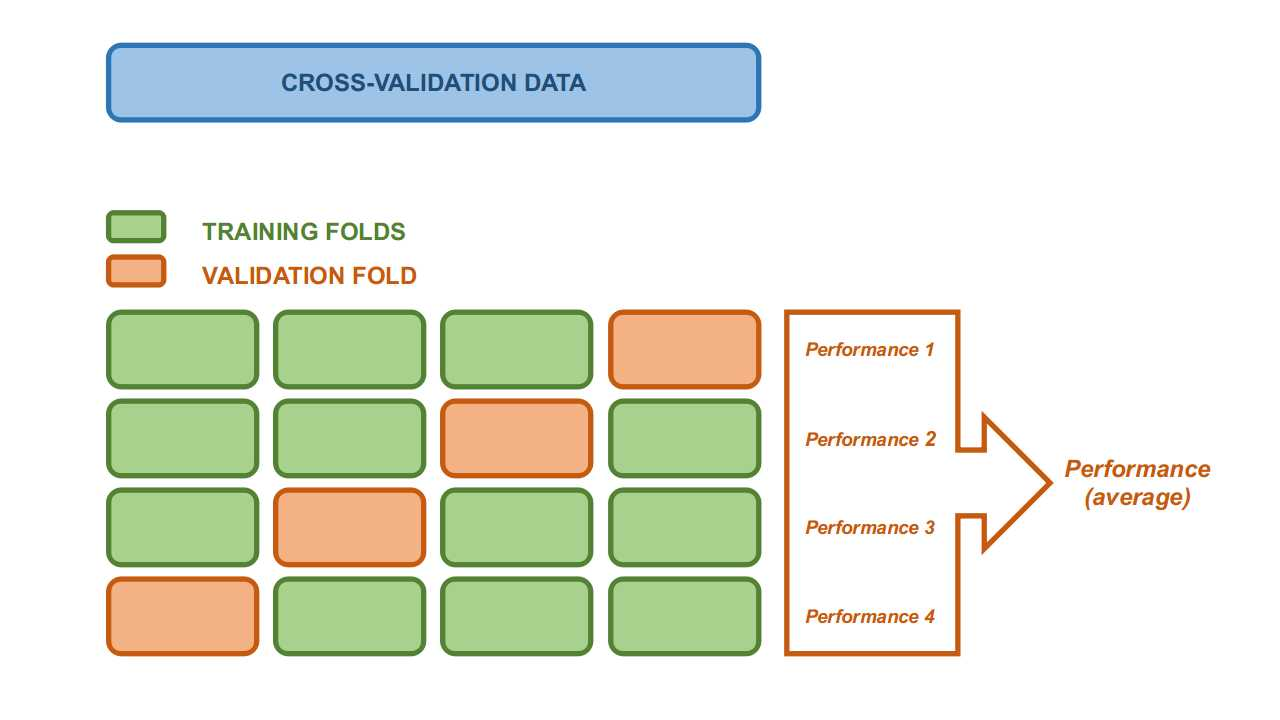
    
<table><tr>
    <td width=800>
        <center>
            <br>
            Figure 6.  Data splitting for a Cross Validation with $k = 4$ folds.
        </center>
    </td>
</tr></table>

A **$k$-fold CV** splits the data in $k$ parts (**folds**), and, at each iteration:
   - uses **$k$-1** folds for training
   - uses the **remaining** fold for testing (_although we indistinctively call it **validation** set, in this context_)

The model is tested $k$ times, always on unseen data.

In this way, CV actually tackles 2 issues:

- Assessment of **bias**<br>
  _(i.e. how much the model depends on a specific training set)_

- Exploitation of the **whole dataset**<br>
  _(i.e. all data are eventually used for both training and testing)_

Each model fit produces a performance score, therefore we can obtain both an **average** estimate, and a **uncertainty** on it.

<u>IMPORTANT:</u> While the CV gives performance estimates, the final model shall be **_re_-trained on all** the data.<br>
$~~~~~~~~~~~~~~~~~~~$ We can reasonably assume that the re-trained model will be at least as performing as the CV average.

- - -

**Q:** What is the right $k$?<br> 
**R:** Common values range between 3 and 10, but depends on:
- how many data we have<br>
- how much time we have<br>

because for larger $k$ we got more estimates, but in exchange we get:

- a smaller test set at each iteration
- more computations


<font size=3><u>**Variants**</u><font>

- **Repeated CV**: CV, but repeated $n$ times with different shuffling

- **Stratified CV**: CV, but the demographics of each fold is representative of the data (e.g., same class demoographics)

## Cross Validation for hypeparameter tuning

You can use CV to select the best hyperparameter for a classifier $-$ e.g. the **_C_** parameter of a SVM classifier:

- Just run the CV as above, and at each iteration _fit_ and _assess_ a model for each **_C_** you want to evaluate.

- The "_best **C**_" is the one that <u>on average</u> yields the best performance.

- Re-train on all data using "_best **C**_".

<u>IMPORTANT</u> This time we <u>cannot</u> use the **Validation** set for _both_ selecting the best hyperparameter _and_ assessing the performance! Use instead a hold-out test set!

<div class="alert alert-block alert-warning" style="margin-top: 20px">

#  In-class Exercise [30 mins]

**Objective:** The ultimate objective is to figure out the best hyperparameter **_C_**.

**Tasks**:

The best hyperparameter will by found by implementing a cross-validation loop for the data and SVC classifier above:

1. Keep out a _hold-out test_ set (separated from your a _master training_ set)
<br><br>
2. At each CV loop you must:
    1. further split the master training set in _train_ and _validation_ folds
    2. train the classifier on the _train_ fold on all the **_C_**'s you want to consider
    3. assess the performance (accuracy) on the _validation_ fold
    4. store the results
<br><br>
3. At the exit of the loop:
    1. identify the the "_best **C**_" model
    3. retrain the "_best **C**_" model on _all_ master training data $\rightarrow$ this provides the actual model
<br><br>
4. Make sure you got your estimate right, by measuring the performance of your model on the unseen _hold-out test_ set $\rightarrow$ this provides an assessment of the model

**Hints:**

You will find an already functioning "proxy" code $\rightarrow$  You will have to edit it to achieve the tasks.<br>
_Pay attention to the comments!_

**In-class discussion:** Why are the mean performance and standard deviation of the the "_best **C**_" models at each iteration biased?
    </div>

In [98]:
########################################
########################################
# Edit this block with the proper code #
########################################
########################################

# Use the:
#     sklearn.metrics.accuracy_score
# function to calculate the accuracy quickly
#
# Instructions:
#     https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# suppressing Matplotlib warnings for previous versions
from matplotlib import cm
from sklearn import datasets, svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

print('Data shape:', X.shape)

n_samples = len(X)

# Shuffling the data:
np.random.seed(42)
idxs_shuffled = np.random.permutation(n_samples)
X = X[idxs_shuffled]
y = y[idxs_shuffled].astype(float)

k = 4
# number of folds

accuracies = {}
# accuracies = {
#     '1':   [0.97, 0.85, 0.98, 0.47],
#     '10':  [0.85, 0.97, 0.91, 0.90],
#     '100': [0.73, 0.85, 0.74, 0.82],
#     ...
# }

for i in range(k):
# folding loops
    
    idxs = np.arange(n_samples)
    
    n_objects_fold = int(n_samples/k)
    
    ###################################
    ###################################
    # Generalize this for _any_ k ... #
    ###################################
    ###################################
    idxs_1 = list(idxs[:n_objects_fold])
    idxs_2 = list(idxs[n_objects_fold:2*n_objects_fold])
    idxs_3 = list(idxs[n_objects_fold*2:n_objects_fold*3])
    idxs_4 = list(idxs[n_objects_fold*3:])
    
    if i==0: 
        idxs_train = idxs_1 + idxs_2 + idxs_3
        idxs_valid = idxs_4
    if i==1: 
        idxs_train = idxs_1 + idxs_2 + idxs_4
        idxs_valid = idxs_3
    if i==2: 
        idxs_train = idxs_1 + idxs_3 + idxs_4
        idxs_valid = idxs_2
    if i==3: 
        idxs_train = idxs_2 + idxs_3 + idxs_4
        idxs_valid = idxs_1
    
    X_train, X_valid = X[idxs_train], X[idxs_valid]
    y_train, y_valid = y[idxs_train], y[idxs_valid]
        
    print('----end of iteration %s-----' % i)
    
    C_possible = [1, 10, 100]
    
    for C in C_possible:
        
        if i == 0:
            accuracies[C] = []
        
        print('Training with C=%s' % C)
        clf_C = svm.SVC(kernel='linear', C=C)
        clf_C.fit(X_train, y_train)
        
        yhat_valid = clf_C.predict(X_valid)
        accuracy_C = accuracy_score(y_valid, yhat_valid)
        accuracies[C].append(accuracy_C)
        print('\tAccuracy on validation fold: %.2f' % accuracy_C)

Data shape: (150, 4)
----end of iteration 0-----
Training with C=1
	Accuracy on validation fold: 0.95
Training with C=10
	Accuracy on validation fold: 1.00
Training with C=100
	Accuracy on validation fold: 0.97
----end of iteration 1-----
Training with C=1
	Accuracy on validation fold: 0.95
Training with C=10
	Accuracy on validation fold: 0.89
Training with C=100
	Accuracy on validation fold: 0.89
----end of iteration 2-----
Training with C=1
	Accuracy on validation fold: 0.97
Training with C=10
	Accuracy on validation fold: 0.97
Training with C=100
	Accuracy on validation fold: 0.97
----end of iteration 3-----
Training with C=1
	Accuracy on validation fold: 1.00
Training with C=10
	Accuracy on validation fold: 0.97
Training with C=100
	Accuracy on validation fold: 1.00


In [99]:
# Nothing to touch in this block (if you did the things right!)
mean_accuracies = {}

for C in accuracies.keys():
    
    mean_accuracies[C] = np.mean(accuracies[C])
    
display(mean_accuracies)  

best_C = max(mean_accuracies, key=mean_accuracies.get)
print('Best C: %s' % best_C)

{1: 0.9669092169092168, 10: 0.9594594594594594, 100: 0.9598059598059598}

Best C: 1


In [100]:
# Retraining on the best mdel:

clf_best = svm.SVC(kernel='linear', C=best_C)
clf_best.fit(X, y)

# WRONG: Keep out a test set at the top!!! ###################################
yhat = clf_best.predict(X)
accuracy_best = accuracy_score(y, yhat)
print('(overestimated) Accuracy of best model: %.2f' % accuracy_best)
##############################################################################

# The right prediction is instead ... ########################################
##############################################################################

(overestimated) Accuracy of best model: 0.99


## CV in sklearn

Thankfully, some automated CV tools are already present in `sklearn.model_selection` $-$ notably:

> `GridSearchCV`<br>
> $\rightarrow$ _Extensively try <u>all</u> possible hyperparameter combinations within a hyperparameter grid specified by the user_
>
> `RandomizedSearchCV`<br>
> $\rightarrow$ _A fixed number of hyperparameter settings is sampled <u>at random</u> from the user-specified constraints_

<hr style='height:1px'>

**IMPORTANT**: Do NOT forget to write your group name in the cell below, and rename this file to \<group\>\_HW\<N\>\_2024.ipynb, where "\<group\>" is your group name and \<N\> is the Homework number.

_It's enough that 1 student of the group submits the solutions for the whole group._

You can leave the above code or $-$ _better!_ $-$ remove it.  But, in any case, <u>make sure</u> that the notebook gives the results you expected when it's run from top to bottom (you might have saved variables in blocks executed before and then deleted!).  We will not debug it for you!

**Group name**: _ _ _ _ _ _

<hr style='height:1px'>

# HomeWork 04

<font size=1>
    Nikolaos Vasilas & Elias Kyritsis, 2024. All rights reserved.
</font>  

<div class="alert alert-block alert-warning" style="margin-top: 20px">
       
**Exercise 1: Support Vector Machine Classification**
    <br><br>
    Following this week's lecture, let's use the Support Vector Machine and train an algorithm on real astronomical data. In modern astrophysics, the continuous flow of data and the need to analyze it accurately has made machine learning algorithms very helpful for observational and theoretical astronomers.<br><br>

**Objective:** 
<br>
Stellar classification relies on a star's spectral data to sort stars into distinct categories. The current system, called the Morgan–Keenan (MK) classification, is based on the earlier Hertzsprung–Russell (HR) classification and uses chromaticity along with Roman numerals to indicate a star’s size. In this exercise, we’ll be using the Absolute and Apparent Magnitude, B-V Color Index, Parallax Distance, Surface Temperature, and Luminosity of stars to distinguish between Giants and Dwarfs.
    
    
> Keep in mind that:
    >
> - The Absolute magnitude can be calculated as:
$$
\begin{equation}
M = m + 5(\log_{10}(p) +1)  \tag{Eq. 1}
\end{equation}
$$
<br>
    > - The Surface Temperature in Kelvin is given by the formula:
    $$
\begin{equation}
T = \frac{4600}{0.92 \cdot (B - V) + 1.7} + \frac{4600}{0.92 \cdot (B - V) + 0.62}\tag{Eq. 2}
\end{equation}
$$
<br>
    > - The luminosity of a star:
 $$
\begin{equation}
\frac{L}{L_\odot} = 10^{0.4 (4.85 - M)}\tag{Eq. 3}
\end{equation}
$$
    > <br><br>
> Where \( $M$ \) is the Absolute Magnitude, \( $m$ \) is the Apparent Magnitude, \( $p$ \) is the parallax (distance between the Sun and the star), \( $T$ \) is the Surface Temperature, and \( $L$ \) is the Luminosity of stars. 

The dataset contains 3180 rows and 7 columns (features). The features included in the dataset are:
     
    Vmag (Apparent Magnitude)
    Plx (Parallax Distance)
    B-V (B-V Color Index)
    Amag (Absolute Magnitude)
    Temp/Teff (K) (Surface Temperature)
    Luminosity (W) (Luminosity of stars)
    TargetClass (The target classification label)
<br>
    
**Tasks:**
<br>

- **Ex.1.1**: Load the data from the file ```HW04_data.csv```. 
    - Using the ```seaborn``` library plot a `pairplot` for the features, color-coding the instances accorind to the class each instance bellongs.
    - Plot a histogram of the target labels. Comment in one sentence whether there is a posibility that whatever model you will try to train will encounter problems.
    - Add a new column named "class_numeric", where you will replace each class with numerical values, e.g., 'Dwarf' $\leftrightarrow$ 0,and 'Giant' $\leftrightarrow$ 1.<br>
<br>
    
- **Ex.1.2**: Constuct an SVM model for dinsiguishing between 'Dwarf', and 'Giant'. Use as features all the feature of the dataset. In addition, use the default SVM hyperparameters. For this example use a simple train-test protocol (no validation, no CV):
    - Split data in _train_ and _test_
    - Fit on _train_
    - Assess performance on _test_ using the _accuracy_ metric
    - Print the accuracy of your model.<br>
<br>
    
- **Ex.1.3**: A standard technique for the oprimization of the hyperparameters is to use the Grid Search method. Grid Search CV it is a cross-validation technique for finding the optimal hyperparameter values from a given set of hyperparameters in a grid. Use ```sklearn.model_selection.GridSearchCV```, to tune the **_C_** hyperparameter **AND** the **kernel** hyperparameter (and any other hyperparameter you wish) of the SVM applied on your data.
    - For the **C** and **kernel** hyperparameters try the value ranges **C = [1,5,10]** and **kernel = ['linear', 'poly', 'rbf']**. Set the number of folds to 5 (i.e., `cv=5`). Print the best score and the best fit parameters that the GridSearchCV returns.
    - By using the optimal hyperparameters combination, evaluate the performance of your best model on a hold-out test that you kept out in the begining of **Ex.1.3** (separated from your a master training set). Print the accuracy of your best model, the final classification report and the confusion matrix of your best model. 
    - What do you notice, by comparing the accuracy scores of Ex.1.2 and Ex.1.3 ? Comment in one-two sentences.
<br><br>

- **[Bonus] Ex 1.4**: <br>
    Run the same protocol as in **Ex.1.3** but now train for the features, 'Amag', 'Temp/Teff (K)', and 'Luminosity (W)'. Compare the accuracy from that of **Ex.1.3**: do you expect that result? 
<br>
    
- **[Bonus] Ex 1.5**: <br>
   Plot the decision function of the best models of **Ex.1.3**, and **Ex.1.4** in the (Surface Temperature, Luminosity) space.


**Hints:**

- The documentation of SVM algorithm is [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- The documentation of ```sklearn.model_selection.GridSearchCV``` is [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- Load the data with ```pandas.read_csv```. See documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) 
- For the third step of **Ex.1.1** see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)
- For **Ex 1.5** use:
    ```plt.xscale('log')``` and 
     ```plt.yscale('log')```
- Don't forget to nomalize before running SVM $-$ use the `StandardScaler` (documentation [here](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html))
- Don't forget to have fun!


      Vmag    Plx    B-V TargetClass       Amag  Temp/Teff (K)  \
0     5.99  13.73  1.318       Dwarf  16.678353    4089.516341   
1     8.70   2.31 -0.045       Dwarf  15.518060   10723.648049   
2     5.77   5.50  0.855       Dwarf  14.471813    5120.212718   
3     6.72   5.26 -0.015       Giant  15.324929   10316.282219   
4     8.76  13.44  0.584       Giant  19.401996    6030.905633   
...    ...    ...    ...         ...        ...            ...   
3175  7.79  12.92  0.772       Dwarf  18.346313    5366.546245   
3176  7.29   3.26  1.786       Dwarf  14.856088    3408.552355   
3177  8.29   6.38  0.408       Giant  17.314103    6837.926421   
3178  6.11   2.42  1.664       Dwarf  13.029077    3562.420235   
3179  8.81   1.87  1.176       Dwarf  15.169208    4356.363995   

      Luminosity (W)  class_numeric  
0       6.976392e+21              0  
1       2.031178e+22              0  
2       5.324104e+22              0  
3       2.426613e+22              1  
4       5.677712e

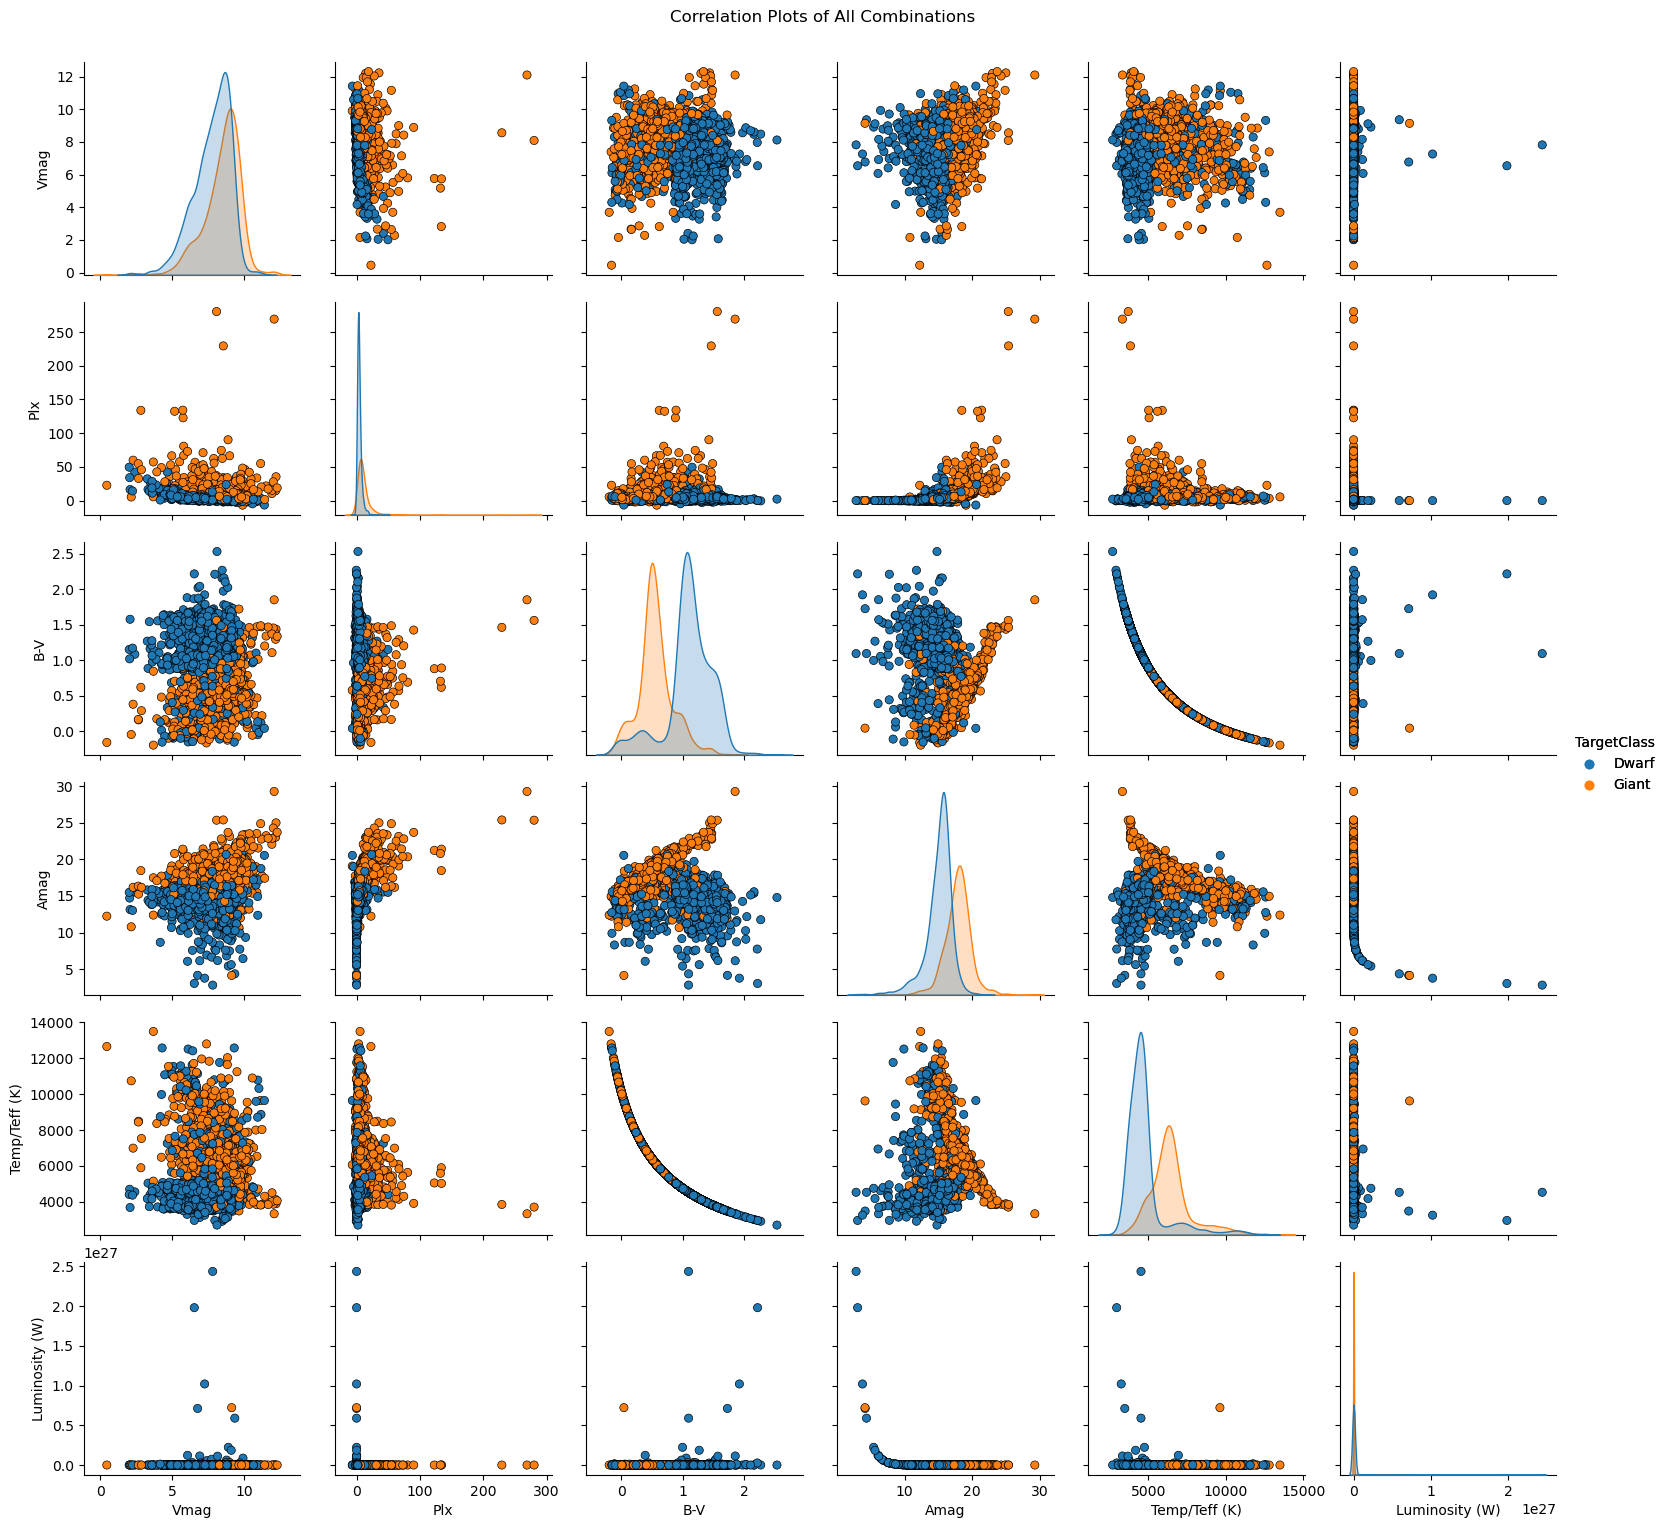

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


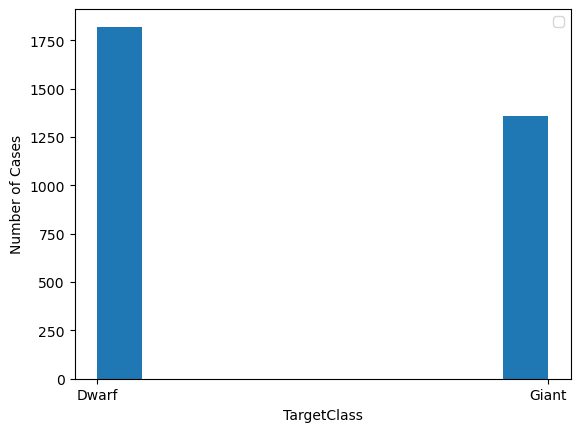

Accuracy of svm model: 0.9009433962264151


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay , classification_report
import warnings

warnings.filterwarnings("ignore")

#EX.1 & EX.2

dff = pd.read_csv('C:/Users/micha/Desktop/python_datafiles/HW04_data.csv')
X = dff[['Vmag', 'Plx', 'B-V', 'Amag','Temp/Teff (K)','Luminosity (W)']]
y = dff['TargetClass']
dff['class_numeric'] = dff['TargetClass'].replace({'Dwarf': 0, 'Giant': 1})
scale = StandardScaler()
print(dff)

class SVM:
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.dff = pd.DataFrame(X, columns=['Vmag', 'Plx', 'B-V', 'Amag','Temp/Teff (K)','Luminosity (W)']) 
        self.dff['TargetClass'] = y
        
    def splitdata(self, test_size=0.2, random_state=42):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

    def plots(self): 
        p = sns.pairplot(data=self.dff, hue="TargetClass",plot_kws={'s': 35,'edgecolor': 'black'})
        p.add_legend()    
        plt.suptitle("Correlation Plots of All Combinations", y=1.02)
        plt.show()

        plt.hist(data=self.dff,x="TargetClass")
        plt.xlabel('TargetClass')
        plt.ylabel('Number of Cases')
        plt.legend()
        plt.show()
        return()
        

x = SVM(X,y)
x.plots()   
X_train, X_test, y_train, y_test = x.splitdata()
X_train = scale.fit_transform(X_train) 
X_test = scale.transform(X_test) 
#if the dataset has overlapping features or imbalanced classes, there may be a problem with model training and the class seperation

model = svm.SVC()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print(f'Accuracy of svm model: {accuracy}')

Best Score from Grid Search: 0.9025153535572297
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy of best model: 0.9009433962264151
              precision    recall  f1-score   support

       Dwarf       0.90      0.93      0.91       362
       Giant       0.90      0.87      0.88       274

    accuracy                           0.90       636
   macro avg       0.90      0.90      0.90       636
weighted avg       0.90      0.90      0.90       636

Confusion Matrix
[[335  27]
 [ 36 238]]


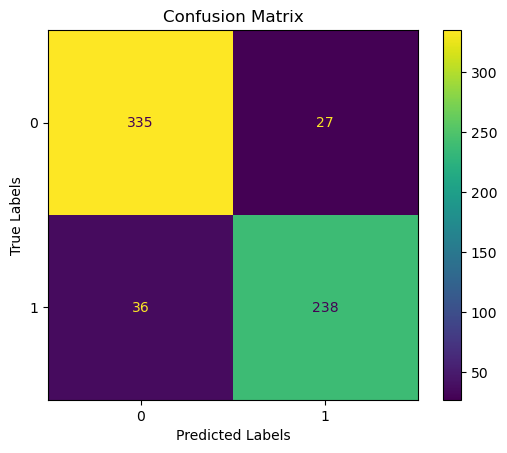

In [4]:
#EX.3
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','poly','rbf'), 'C':[1,5,10]}
clf1 = GridSearchCV(model, parameters,cv=5)
clf1.fit(X_train, y_train)

# Print the best score and best parameters
print("Best Score from Grid Search:", clf1.best_score_)
print("Best Parameters:", clf1.best_params_)

#a model with the best parameters that we found
best_C = clf1.best_params_['C']
best_kernel = clf1.best_params_['kernel']
best_model_ = svm.SVC(C=best_C, kernel=best_kernel)
#best_model= svm.SVC(C=1,kernel='rbf')
best_model_.fit(X_train,y_train)
yhat_best = best_model_.predict(X_test)
best_accuracy = accuracy_score(y_test, yhat_best)
print(f'Accuracy of best model: {best_accuracy}')


#classification report
print(classification_report(y_test, yhat_best))
#confusion Matrix
matrix=metrics.confusion_matrix(y_test, yhat_best)
print("Confusion Matrix")
print(matrix)
matr = ConfusionMatrixDisplay(confusion_matrix=matrix)
matr.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#the accuracy we found on ex.2 is the same as best models accuracy in ex.3, 
#so  that hyperparameter tuning did not improve the performance of the SVM model on this dataset
#however, the consistency in accuracy confirms the robustness of the model across different parameter configurations

In [ ]:
#EOF 

In [ ]:
#EOF